> by Cengizhan Aydin (cay7466) and Viktoriia Simakova (vsi3776)

# Computer Vision Features Notebook

This notebook contains exercises for the computer vision features material.

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
!python -m wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/lemur_img.png -o lemur_img.png


Saved under lemur_img.png


### Exercise 1 - Derive the min-max normalization.

Derive the min-max normalization from the following constraints:

i.) $f(x) := kx + d$

ii.) $f(max) = 1$

iii.) $f(min) = 0$


*Notice:* Put your derivation in the next cell (you can either use latex notation inside markdown or a foto).

$f(max) := k * max + d = 1$

$f(min) := k * min + d = 0$

---

$f(min) := k * min + d = 0$

$k * min = -d$

$-(k * min) = d$

---

$f(max) := k * max + d = 1$

$k * max - k * min = 1$

$k * (max - min) = 1$

$\frac{1}{max - min} = k$

---

$f(x) = k * x + d$

$f(x) = \frac{1}{max - min} * x - \frac{1}{max - min} * min$

$f(x) = \frac{x}{max - min} - \frac{min}{max - min}$

$f(x) = \frac{x - min}{max - min}$

### Exercise 2 - Implement the min-max normalization.

Use the formula you derived in the previous exercise and implement the min-max normalization for a given numpy array.  

In [3]:
def normalize(img):

    img_height, img_width, img_channels = img.shape

    min = np.min(img);
    max = np.max(img);

    norm_img = (img - min) / (max - min)

    return norm_img

img = cv2.imread('lemur_img.png')
norm_img = normalize(img)

print(np.min(img), np.max(img))
print(np.min(norm_img), np.max(norm_img))

0 255
0.0 1.0


### Exercise 3 - Histograms:

Implement a function to compute a histogram (using a user supplied number of bins) for a given image. Notice that histograms are usually computed for each color channel separately.

* Make sure your implementation can deal with normalized data (i.e. in a range of 0 and 1).
* Plot your histograms of each color channel using matplotlibs ```bar()``` function.


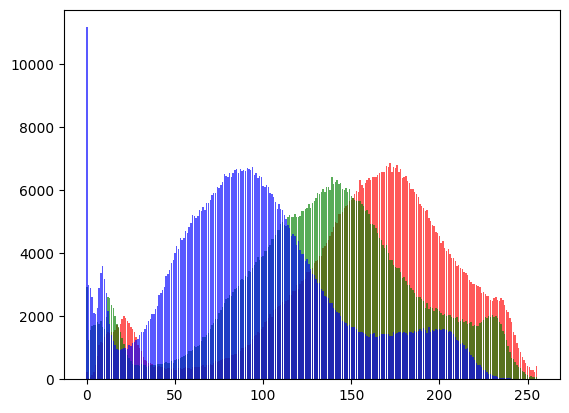

In [4]:
img = cv2.imread('lemur_img.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def hist(img):


    for channel in range(img.shape[2]):
        values, counts = np.unique(img[:,:,channel], return_counts=True)

        if channel == 0:
            color = 'red'
        elif channel == 1:
            color = 'green'
        else:
            color = 'blue'

        plt.bar(values, counts, color=color, alpha=0.65)

    pass

hist(img)

### Exercise 4 - Scale Invariant Feature Transform:

* Compute the SIFT descriptors for the provided images (sift1_img.png and sift2_img.png). See https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html for a tutorial how to use openCV to compute SIFT descriptors.

* Use an openCV feature matcher (https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html) to match your descriptors and visualize the matches as shown in the slides.




In [10]:
!python -m wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/sift1_img.png -o sift1_img.png
!python -m wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/sift2_img.png -o sift2_img.png


Saved under sift1_img.png

Saved under sift2_img.png


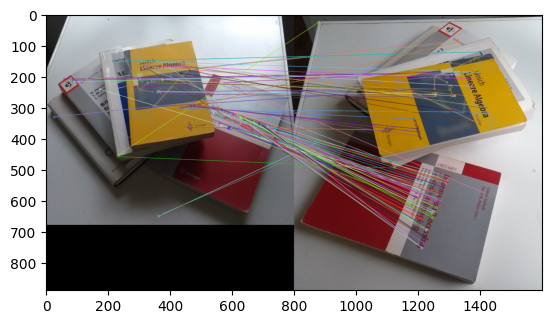

In [5]:
sift1 = cv2.imread('sift1_img.png')
sift2 = cv2.imread('sift2_img.png')

sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(sift1, None)
kp2, des2 = sift.detectAndCompute(sift2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good = []

for m,n in matches:
  if m.distance < 0.75 * n.distance:
    good.append([m])

img3 = cv2.drawMatchesKnn(sift1, kp1, sift2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

plt.imshow(img3)
plt.show()

### Exercise 5 -  Local Binary Patterns:

It is now time to develop the full computer vision pipeline to classify some images.

1. Implement Local Binary Patterns (to do so use a simple 8-neighborhood).
2. Write a method to compute grayscale histograms (not lbp-histograms) for all image data (X_train and X_test). Re-use your implementation from before.
3. Write a method to compute lbp histograms for all image data (X_train and X_test).
4. Train two separate Neural Networks and classify the data using:
    * The grayscale histograms as features
    * The lbp-histograms as features
    
Notice: You will need to one-hot-encode the labels of the dataset to train a neural network (why?). Use the ```tf.keras.utils.to_categorical(Y)``` method to encode your labels accordingly.

Compare and interpret your results, what would you expect? Can you explain the results?



    





In [4]:
!python -m wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/kth_tips.pbz2 -o kth_tips.pbz2


Saved under kth_tips.pbz2


In [6]:
import pickle, bz2
from sklearn.model_selection import train_test_split
import tensorflow as tf

with bz2.BZ2File('./kth_tips.pbz2', 'rb') as fd:
    kth_dataset = pickle.load(fd)

X_train, X_test, Y_train, Y_test = train_test_split(kth_dataset['X'], kth_dataset['Y'], random_state=12345)


In [7]:
import numpy as np

def local_binary_pattern(matrix):
  result = np.zeros(8)
  position = 0
  for x in range(0,matrix.shape[0]):
    for y in range(0,matrix.shape[1]):
      if x == 1 and y == 1:
        continue
      result[position] = 0 if matrix[1][1] > matrix[x][y] else 1
      position+=1
  print
  dez = 0
  for i in range(len(result)):
    dez += 2**i if result[i] == 1 else 0
  return dez

def binary_pattern_image(img):
  result = []
  for x in range(1,img.shape[0]-1):
    for y in range(1,img.shape[1]-1):
      result.append(local_binary_pattern(img[x-1:x+2,y-1:y+2]))

  counter = np.zeros(256)
  for i in range(len(result)):
    counter[result[i]] += 1;
  return counter

def count_occurences(img):
  counter = np.zeros(256)
  for x in range(200):
    for y in range(200):
      counter[int(img[x][y])] +=1
  return counter


In [8]:
X_train_normalized = (X_train - np.min(X_train)) / (np.max(X_train) - np.min(X_train))
X_test_normalized = (X_test - np.min(X_test)) / (np.max(X_test) - np.min(X_test))

In [9]:
X_train_lbp = []
for i in range(X_train_normalized.shape[0]):
    X_train_lbp.append(binary_pattern_image(X_train_normalized[i, :, :]))

X_test_lbp = []
for i in range(X_test_normalized.shape[0]):
    X_test_lbp.append(binary_pattern_image(X_test_normalized[i, :, :]))

X_train_gray = []
for i in range(X_train_normalized.shape[0]):
    X_train_gray.append(np.histogram(X_train_normalized[i, :, :], bins=range(256))[0])

X_test_gray = []
for i in range(X_test_normalized.shape[0]):
    X_test_gray.append(np.histogram(X_test_normalized[i, :, :], bins=range(256))[0])

In [10]:
Y_train_encoded = tf.keras.utils.to_categorical(Y_train)
Y_test_encoded = tf.keras.utils.to_categorical(Y_test)

In [11]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.Input(shape=(256,)))
model.add(keras.layers.Dense(50, use_bias=True, activation="relu"))
model.add(keras.layers.Dense(50, use_bias=True, activation="relu"))
model.add(keras.layers.Dense(50, use_bias=True, activation="relu"))
model.add(keras.layers.Dense(50, use_bias=True, activation="relu"))
model.add(keras.layers.Dense(50, use_bias=True, activation="relu"))
model.add(keras.layers.Dense(50, use_bias=True, activation="relu"))
model.add(keras.layers.Dense(50, use_bias=True, activation="relu"))
model.add(keras.layers.Dense(50, use_bias=True, activation="relu"))
model.add(keras.layers.Dense(50, use_bias=True, activation="relu"))
model.add(keras.layers.Dense(50, use_bias=True, activation="relu"))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(
    optimizer=keras.optimizers.Adam(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.CategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=["acc"],
)

epochs = 200

history = model.fit(
    np.array(X_train_lbp),
    Y_train_encoded,
    batch_size=32,
    epochs=epochs,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(np.array(X_test_lbp), Y_test_encoded),
)

Epoch 1/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - acc: 0.1079 - loss: 5.9384 - val_acc: 0.2956 - val_loss: 1.9952
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.3482 - loss: 1.8207 - val_acc: 0.5074 - val_loss: 1.4459
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.5817 - loss: 1.3004 - val_acc: 0.6207 - val_loss: 1.2228
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6763 - loss: 1.0327 - val_acc: 0.6798 - val_loss: 1.0665
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6798 - loss: 0.9709 - val_acc: 0.6798 - val_loss: 1.0277
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6962 - loss: 0.8794 - val_acc: 0.6700 - val_loss: 1.0061
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7834 - loss: 0.6426 - val_acc: 0.7734 - val_loss: 0.7979
Epoch 8/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8465 - loss: 0.4994 - val_acc: 0.7882 - val_loss: 0.7601
Epoch 9/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.846

In [12]:
_, acc = model.evaluate(np.array(X_test_lbp), Y_test_encoded, verbose=0)
print(f"Accuracy: {acc:.2f}, after {epochs} epochs")

Accuracy: 0.94, after 200 epochs


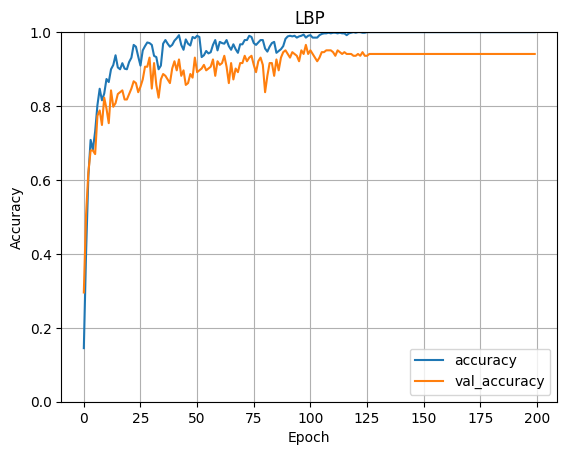

In [15]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('LBP')
plt.grid()
plt.show()

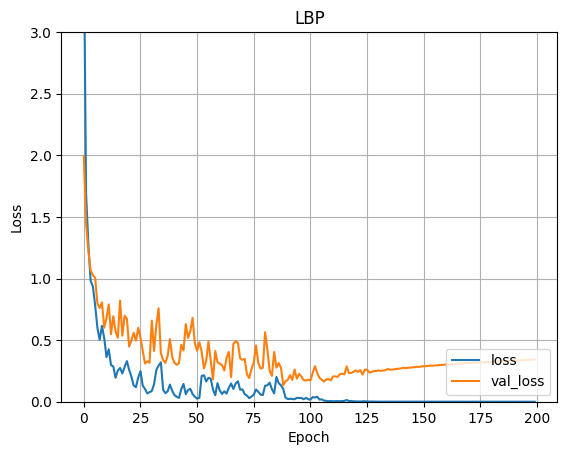

In [16]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 3])
plt.legend(loc='lower right')
plt.title('LBP')
plt.grid()
plt.show()


<img src="https://i.redd.it/w546ujwux4m01.png" width=400 />